# Rapport de Dataviz : MusicTagInspyrer

### Introduction
This project is an exercise in the framework of DataScientest training. The idea is to use the signal characteristics of a music track (Fourier Transform, etc...) to automatically classify this track within 10 genres : blues, classical, country, disco, hiphop, jazz, metal, pop, reggae & rock. For this aim we used the dataset provided __[here](http://marsyas.info/)__, composed of 100 tracks for each style.
<br>A kaggle on this topic does also exist (_[here](https://www.kaggle.com/insiyeah/musicfeatures?select=data.csv)_).

### Goal :
More precisely, the **goal** is first to classify musics within ten categories, thanks to a machine learning algorithm. 
<br> In a second time, we implemented tracks of recent music genres non-classified in the dataset, and looked at how they were influenced by the classified genres.



## A first exploration of the dataset

In what follows is presented a quick exploration of the dataset

### Importing the dataset

In [1]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import statsmodels.api
%matplotlib inline

sns.set()

# Reading data

music_df = pd.read_csv('data.csv')

In [2]:
#Characteristics of the data frame
print('Shape : ', music_df.shape)
music_df.head()

Shape :  (1000, 30)


,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,...,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,...,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,...,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,...,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,...,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


By th exploration of the DataFrame we can make the following obsevations :
- We are in the case of a **supervided classification problem** (in the next steps we will dertermine if the classes are **balanced** or **imbalanced**),
- the **target variable** is **label**.

### Meaning of the variables
The following dictionary explains briefly the meaning of each column in the dataset.

In [3]:
explo_report = pd.read_excel('Exploration_report.xlsx')
d = {'Variable':explo_report.iloc[2:,1],'Description': explo_report.iloc[2:,3]}

description_df = pd.DataFrame(d)
description_df.set_index('Variable',inplace=True)
description_df.T

NameError: name 'pd' is not defined

### Dataset characteristics

As one can see, in what follows the dataset is complete. There are no missing values.

In [3]:
music_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            1000 non-null   object 
 1   tempo               1000 non-null   float64
 2   beats               1000 non-null   int64  
 3   chroma_stft         1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   spectral_centroid   1000 non-null   float64
 6   spectral_bandwidth  1000 non-null   float64
 7   rolloff             1000 non-null   float64
 8   zero_crossing_rate  1000 non-null   float64
 9   mfcc1               1000 non-null   float64
 10  mfcc2               1000 non-null   float64
 11  mfcc3               1000 non-null   float64
 12  mfcc4               1000 non-null   float64
 13  mfcc5               1000 non-null   float64
 14  mfcc6               1000 non-null   float64
 15  mfcc7               1000 non-null   float64
 16  mfcc8  

In [4]:
# Classes of the target variable (label)
music_df["label"].value_counts(ascending = False)

country      100
hiphop       100
classical    100
metal        100
rock         100
blues        100
disco        100
reggae       100
pop          100
jazz         100
Name: label, dtype: int64

From the result below, we can see the classes (pop, reggae, disco,...,jazz, rock, hiphop) of the target variable (label) are well balanced.
We can say, that we are in a **balanced supervided classification problem**.

In [5]:
# Removing the filename column
print("The filename column is not useful for the machine learning algorithm. So we decide to remove it.")
music_df = music_df.drop(["filename"], axis = 1)

The filename column is not useful for the machine learning algorithm. So we decide to remove it.


In [6]:
# Variables description
music_df.describe()

,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,119.601702,57.138000,0.378656,0.130929,2201.834226,2242.559613,4571.702159,0.103637,-144.479173,99.552199,...,-6.021121,4.471604,-4.797232,1.781547,-3.870275,1.147988,-3.967431,0.507303,-2.328779,-1.094875
std,28.297367,14.225728,0.081689,0.065685,715.961347,526.337663,1574.770035,0.041834,100.235661,31.331904,...,6.819018,6.717312,6.170919,5.009489,4.874423,4.579110,4.550650,3.869088,3.755574,3.837561
min,54.978391,18.000000,0.171782,0.005276,569.930721,897.994319,749.062137,0.021701,-552.064063,-1.527148,...,-28.052265,-15.805227,-27.542309,-12.598773,-17.545474,-15.693589,-17.227765,-11.975698,-18.504188,-19.935203
25%,99.384014,47.000000,0.319641,0.086625,1627.793931,1907.136505,3380.956639,0.070281,-200.695133,76.811480,...,-10.966826,-0.551576,-9.363372,-1.640080,-7.164838,-1.857098,-7.194297,-2.003979,-4.670281,-3.368000
50%,117.453835,56.000000,0.383075,0.122448,2209.468780,2221.408983,4658.671830,0.099539,-120.206072,98.452551,...,-5.920161,3.891842,-4.199810,1.879424,-3.614473,1.211944,-4.059109,0.669788,-2.391261,-1.155198
75%,135.999178,65.250000,0.435974,0.175793,2691.969702,2578.474352,5534.197785,0.132007,-73.895019,119.893638,...,-1.004241,9.706133,-0.161017,5.155264,-0.323536,4.350694,-0.842968,3.112518,0.149070,1.303739
max,234.907670,117.000000,0.663573,0.398012,4434.439444,3509.578677,8676.405868,0.274829,42.034587,193.096518,...,17.421038,23.037571,13.054333,18.161663,12.357588,13.468803,11.489994,15.379257,14.686910,15.368966


### Visualizing the distribution for each numerical feature

Here we will plot the distributions for each feature.

#### Histograms

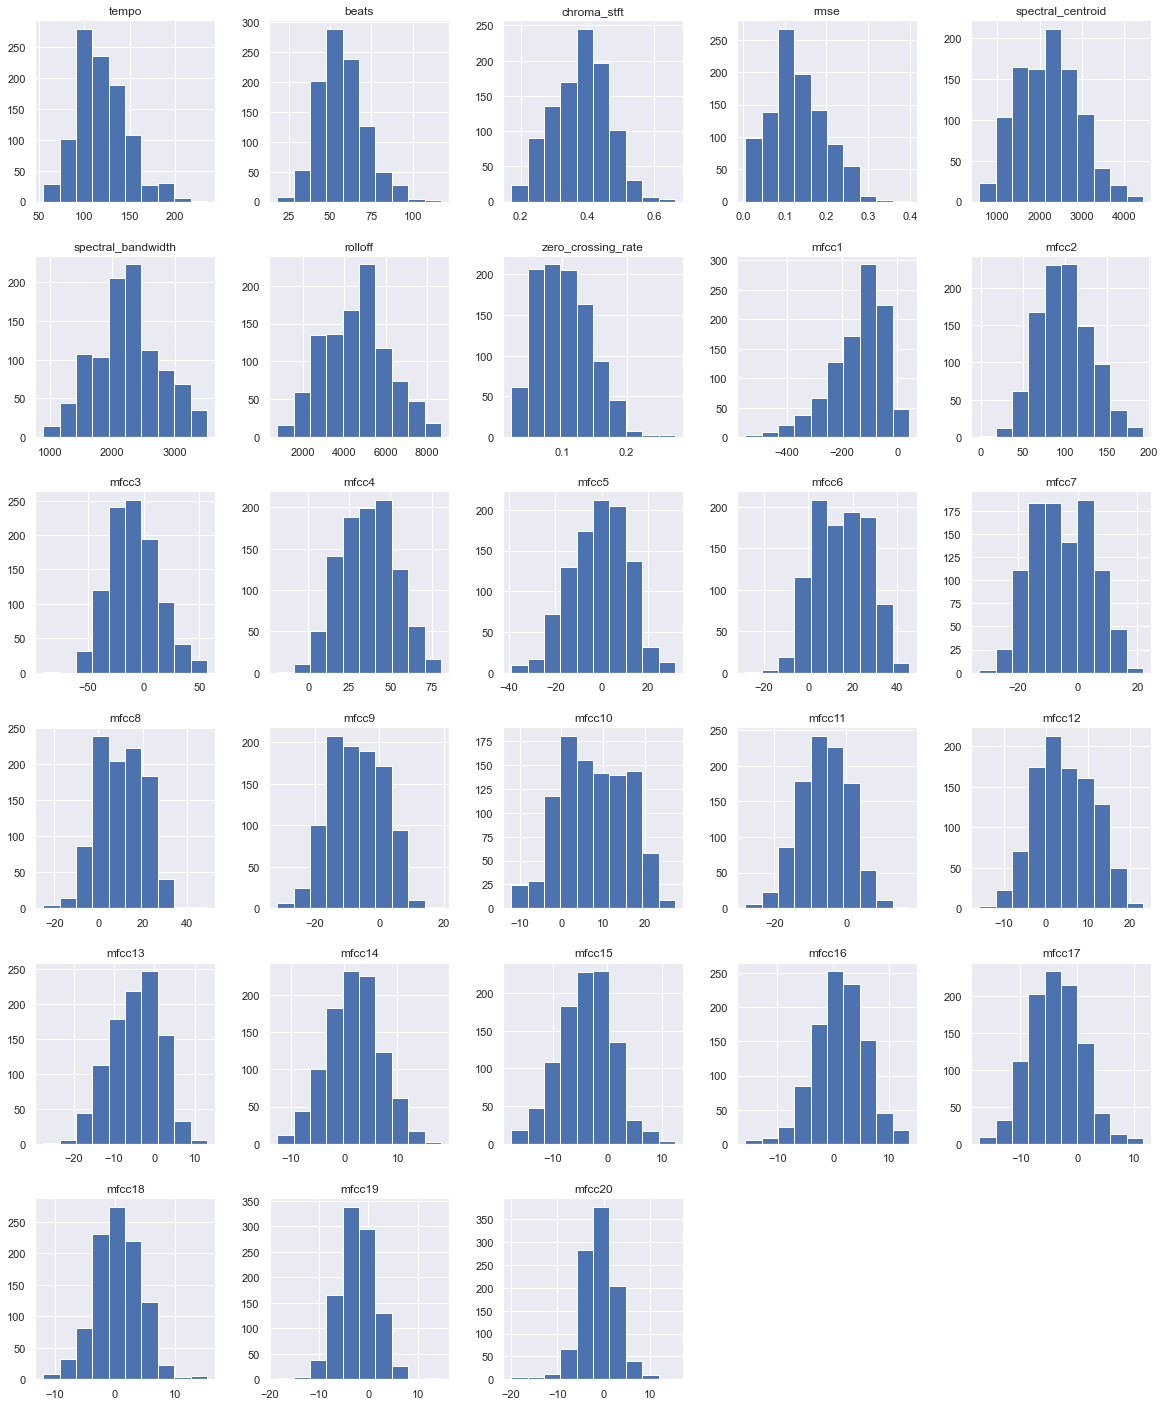

In [8]:
music_df.hist(figsize=(20,25));

#### Checking the outliers

In [1]:
# AJouter les boxplot en grille

### Visualizing the correlations between variables

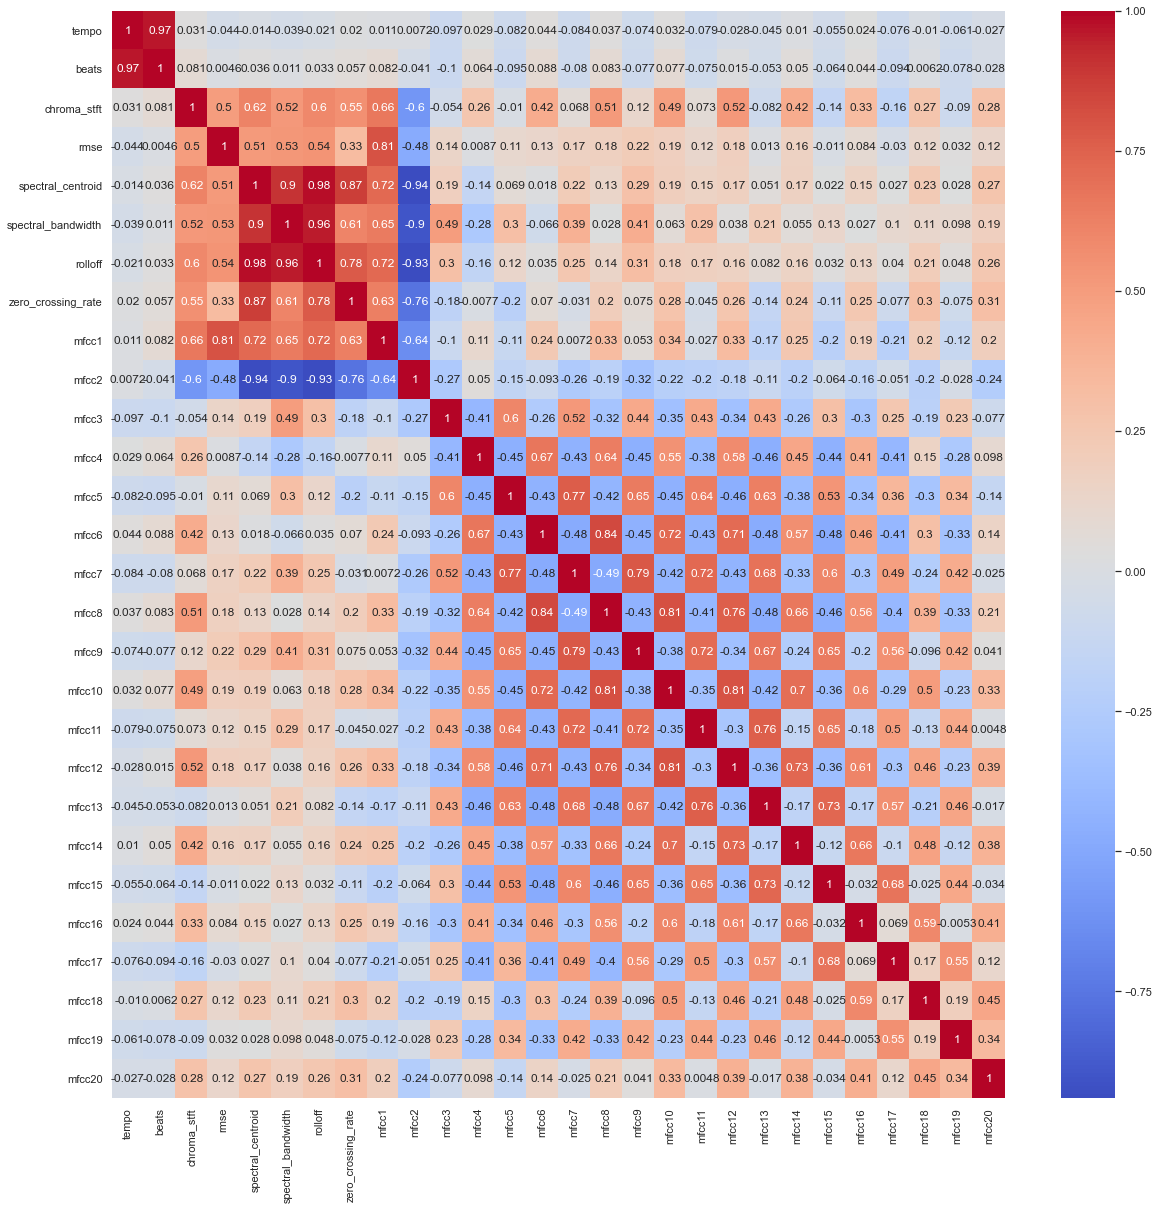

In [9]:
cor = music_df.corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data=cor, annot= True,ax=ax,cmap='coolwarm');

### Correlations with the target

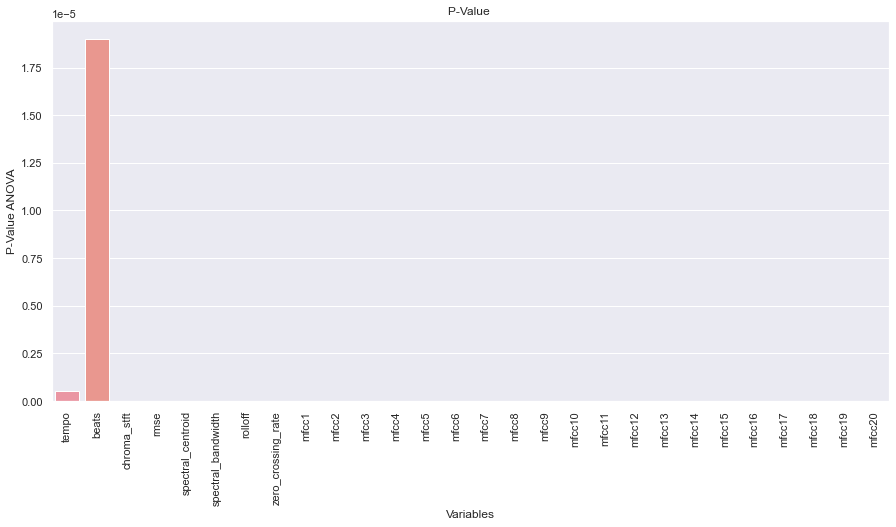

In [10]:
# Correlation between the numeric variables and the target

# Function to calculate p-value ANOVA 
def anova_p_value (col,data_frame):
    result = statsmodels.formula.api.ols('col ~ label', data = data_frame).fit()
    table = statsmodels.api.stats.anova_lm(result)
    p_value_anova = table["PR(>F)"][0]
    return p_value_anova

# Evaluation of p-value ANOVA
num_music_df = music_df.select_dtypes(['number'])
label_features = list(num_music_df.keys())
coeff_tab =[]
for col in num_music_df.columns:
    coef = anova_p_value(num_music_df[col],music_df)
    coeff_tab.append(coef)

# Creating a DataFrame with the lists label_features and coeff_tab
df = pd.DataFrame(list(zip(label_features, coeff_tab)), 
               columns =['Variables', 'P-Value ANOVA'])

# Countplot
plt.figure(figsize = (15,7))
plt.xticks(rotation = 90)
plt.title("P-Value ")
sns.barplot(x = "Variables", y = "P-Value ANOVA", data = df);

In [11]:
# Interval of P-Value ANOVA
print("The interval of all p-values ANOVA of the diffrrents numeric columns is :","[",df["P-Value ANOVA"].min(),",",df["P-Value ANOVA"].max(),"].")

The interval of all p-values ANOVA of the diffrrents numeric columns is : [ 6.759675122132669e-199 , 1.9015906206586574e-05 ].


All the numeric variables are dependant of the target.